    Exercise Sheet Week 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-09-25 11:17:23.425342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Task 2

In [2]:
data = pd.read_csv('faithful.dat', delimiter = '\s+', skiprows=25)
erup = data['eruptions'].to_numpy()

## 2.a

In [16]:
def EM(random_seed, num_components, num_interations, data, tolerance):
    # Initialize parameters randomly
    np.random.seed(random_seed)
    mu = np.random.rand(num_components) * data.max()
    sigma = np.random.rand(num_components) * data.std()
    pi = np.ones(num_components) / num_components


    #save parameter to later check for convergence
    prev_mu = mu.copy()
    prev_sigma = sigma.copy()
    prev_pi = pi.copy()  
    
    # EM Algorithm
    iterations = num_interations
    for iteration in range(iterations):
        # E-step: Calculate the responsibilities = probability that datapint belongs to each of the components
        responsibilities = np.zeros((len(data), num_components))
        for k in range(num_components):
            responsibilities[:, k] = pi[k] * norm.pdf(data, loc=mu[k], scale=sigma[k])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # M-step: Update parameters
        Nk = np.sum(responsibilities, axis=0)
        pi = Nk / len(data)
        mu = np.sum(data[:, np.newaxis] * responsibilities, axis=0) / Nk
        sigma = np.sqrt(np.sum(responsibilities * (data[:, np.newaxis] - mu) ** 2, axis=0) / Nk)

         # Check for convergence
        mu_change = np.linalg.norm(mu - prev_mu)
        sigma_change = np.linalg.norm(sigma - prev_sigma)
        pi_change = np.linalg.norm(pi - prev_pi)

        if mu_change < tolerance and sigma_change < tolerance and pi_change < tolerance:
            print(f"Converged after {iteration} iterations.")
            break

        if iteration == num_interations - 1:
            print("Maximum number of iterations reached. No convergence.\n")
            break

    prev_mu = mu.copy()
    prev_sigma = sigma.copy()
    prev_pi = pi.copy()

    # Print the learned parameters
    print("Learned Parameters:")
    for k in range(num_components):
        print(f"Component {k + 1}:")
        print(f"  Mean (mu): {mu[k]:.4f}")
        print(f"  Standard Deviation (sigma): {sigma[k]:.4f}")
        print(f"  Weight (pi): {pi[k]:.4f}\n")
    
    # Create a histogram
    plt.hist(data, bins=20, density=True, alpha=0.6, label="Histogram")

    # Plot the estimated GMM PDF
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = np.zeros_like(x)
    for k in range(num_components):
        pdf += pi[k] * norm.pdf(x, loc=mu[k], scale=sigma[k])
    plt.plot(x, pdf, 'r-', label="GMM PDF")

    plt.xlabel("Eruption Duration")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.title("Histogram and GMM Fit");


Maximum number of iterations reached. No convergence.


Learned Parameters:
Component 1:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484

Component 2:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516



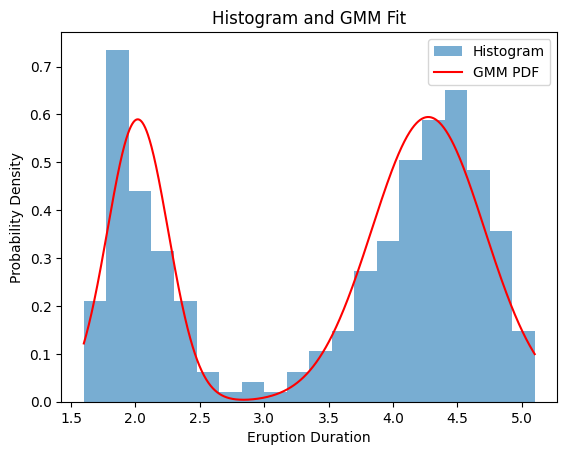

In [11]:
EM(random_seed = 0, num_components=2, num_interations=100, data=erup, tolerance=0.001)

## 2.b

Maximum number of iterations reached. No convergence.

Learned Parameters:
Component 1:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484

Component 2:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516



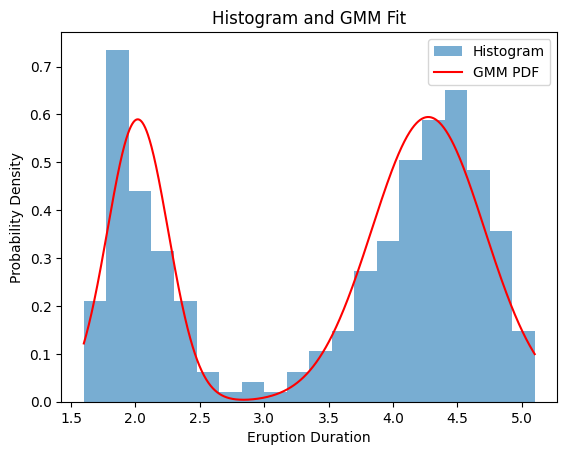

In [13]:
EM(random_seed = 42, num_components=2, num_interations=500, data=erup, tolerance = 0.01)

Maximum number of iterations reached. No convergence.

Learned Parameters:
Component 1:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516

Component 2:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484



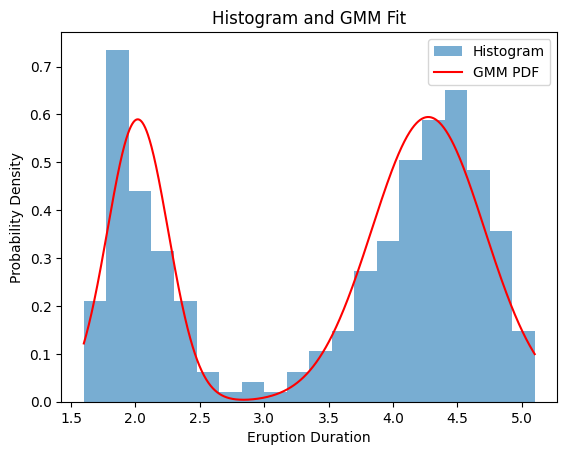

In [14]:
EM(random_seed = 13, num_components=2, num_interations=1000, data=erup, tolerance=0.01)

Maximum number of iterations reached. No convergence.

Learned Parameters:
Component 1:
  Mean (mu): 2.0186
  Standard Deviation (sigma): 0.2356
  Weight (pi): 0.3484

Component 2:
  Mean (mu): 4.2733
  Standard Deviation (sigma): 0.4371
  Weight (pi): 0.6516



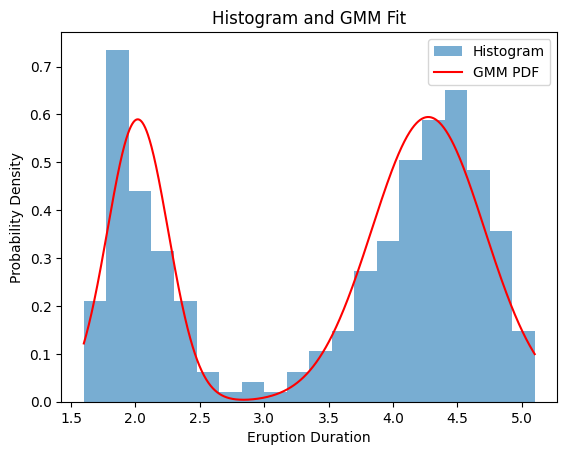

In [15]:
EM(random_seed = 823, num_components=2, num_interations=10000, data=erup, tolerance= 0.1)

# Task 3

In [17]:
#defining data
X = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
t = np.array([0.15, -0.16, -0.61, -0.86, -1.02, -0.44, 0.16, 0.05, 0.45, 1.39, 0.86])

## 3.a

In [18]:
#normalize data
normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
normalizer.adapt(X)

In [19]:
#build the model
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [20]:
#configure training procedure
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [21]:
#fit the model
history = model.fit(
    X,
    t,
    epochs=100,
    # Suppress logging
    verbose=0)

In [22]:
# predict target variable
y = model.predict(X)

1/1 [==============================] - 0s 86ms/step


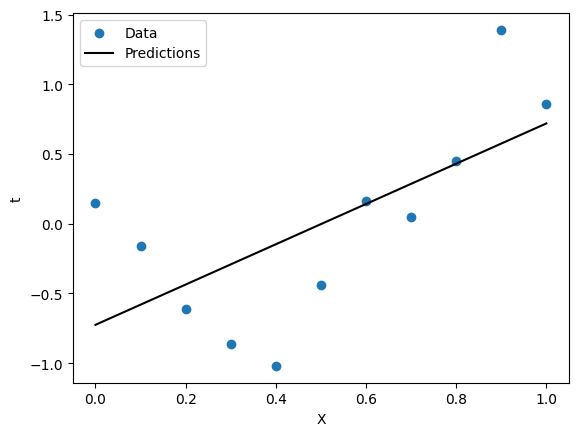

In [23]:
#plotting raw data and estimated model
plt.scatter(X, t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();

## 3.b

In [24]:
# Create the MLP model
model = keras.Sequential([
    layers.Input(shape=(1,)),   
    # Hidden layer with 10 neurons and tanh activation            
    layers.Dense(10, activation='tanh'),  
    # Output layer with linear activation  
    layers.Dense(1, activation='linear')    
])

In [25]:
#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [26]:
# Fit the model and allow to overfit
history = model.fit(
    X, 
    t, 
    epochs=10000, 
    verbose=0)

In [27]:
#predict target
y = model.predict(X)

1/1 [==============================] - 0s 60ms/step


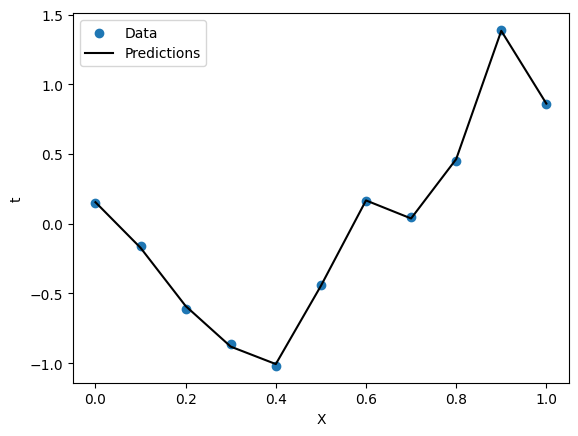

In [28]:
#plotting raw data and estimated model
plt.scatter(X, t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();